In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
for col in df.columns:
    print('*'*20)
    print('NULL %: ',100 * (df[col].isnull().sum()/len(df)).round(2))
    print(df[col].value_counts())
    print('\n\n')

********************
NULL %:  0.0
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64



********************
NULL %:  0.0
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64



********************
NULL %:  0.0
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: cou

In [6]:
# len(df)
df.isnull().sum().sort_values()

area_type          0
availability       0
total_sqft         0
price              0
location           1
size              16
bath              73
balcony          609
society         5502
dtype: int64

In [7]:
df[df['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [8]:
df[df['society']=='Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [9]:
df.at[568, 'location'] = 'Anantapura'

In [10]:
df = df.drop('society', axis =1)

In [11]:
# df.isnull().sum()
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
df['size'] = df['size'].str.split(' ').str[0]

In [13]:
df['total_sqft'].describe()

count     13320
unique     2117
top        1200
freq        843
Name: total_sqft, dtype: object

In [14]:
feet_issue = []
def correct_sqft(st):
    temp = st.split('-')
    if(len(temp)==2):
        return (float(temp[1]) + float(temp[0]))/2
    try:
        return float(st)
    except:
        feet_issue.append(st)
        return None

In [15]:
df['total_sqft'] = df['total_sqft'].apply(correct_sqft)

In [16]:
df.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft       46
bath             73
balcony         609
price             0
dtype: int64

In [17]:
feet_issue

['34.46Sq. Meter',
 '4125Perch',
 '1000Sq. Meter',
 '1100Sq. Yards',
 '5.31Acres',
 '30Acres',
 '716Sq. Meter',
 '1500Sq. Meter',
 '142.61Sq. Meter',
 '1574Sq. Yards',
 '361.33Sq. Yards',
 '117Sq. Yards',
 '3040Sq. Meter',
 '500Sq. Yards',
 '167Sq. Meter',
 '315Sq. Yards',
 '3Cents',
 '188.89Sq. Yards',
 '204Sq. Meter',
 '45Sq. Yards',
 '133.3Sq. Yards',
 '78.03Sq. Meter',
 '122Sq. Yards',
 '84.53Sq. Meter',
 '2.09Acres',
 '24Guntha',
 '697Sq. Meter',
 '142.61Sq. Meter',
 '1500Cents',
 '132Sq. Yards',
 '2Acres',
 '1100Sq. Meter',
 '15Acres',
 '1.26Acres',
 '151.11Sq. Yards',
 '1Grounds',
 '2940Sq. Yards',
 '45.06Sq. Meter',
 '1.25Acres',
 '86.72Sq. Meter',
 '38Guntha',
 '6Acres',
 '120Sq. Yards',
 '24Sq. Meter',
 '142.84Sq. Meter',
 '300Sq. Yards']

In [18]:
df['total_sqft'].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [19]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,51.00


In [20]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [21]:
df['location'] = df['location'].str.strip()

In [22]:
loc_cnt = df['location'].value_counts()

In [23]:
loc_cnt_10 = loc_cnt[loc_cnt<10]

In [24]:
loc_cnt_10

location
Ejipura                           9
2nd Phase JP Nagar                9
B Narayanapura                    9
Chennammana Kere                  9
Vignana Nagar                     9
                                 ..
Bapuji Layout                     1
1st Stage Radha Krishna Layout    1
BEML Layout 5th stage             1
singapura paradise                1
Abshot Layout                     1
Name: count, Length: 1040, dtype: int64

In [25]:
df['location'] = df['location'].apply(lambda x : 'other' if x in loc_cnt_10 else x) 

In [26]:
df['location'].value_counts()

location
other                  2756
Whitefield              541
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          273
                       ... 
BTM 1st Stage            10
Basapura                 10
Sector 1 HSR Layout      10
Kalkere                  10
Nagadevanahalli          10
Name: count, Length: 255, dtype: int64

In [27]:
df.loc[df['availability'] != 'Ready To Move', 'availability'] = 'At available date'

In [28]:
df['availability'].value_counts()

availability
Ready To Move        10581
At available date     2739
Name: count, dtype: int64

In [29]:
df.sample(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price
228,Super built-up Area,Ready To Move,Hebbal,3,1900.0,3.0,2.0,119.0
5403,Plot Area,Ready To Move,other,4,2080.0,4.0,2.0,440.0
8466,Super built-up Area,Ready To Move,Banashankari Stage II,3,1260.0,2.0,1.0,95.0
5138,Plot Area,Ready To Move,Marathahalli,6,1200.0,5.0,2.0,108.0
2603,Super built-up Area,Ready To Move,other,2,1050.0,2.0,1.0,38.0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_sqft,13274.0,1559.626694,1238.405258,1.0,1100.0,1276.0,1680.0,52272.0
bath,13247.0,2.692610,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [31]:
df.columns = df.columns.str.replace('size', 'size_bhk')

In [32]:
# sns.boxplot(data = df, x='size', y = 'total_sqft')
df.isnull().sum()

area_type         0
availability      0
location          0
size_bhk         16
total_sqft       46
bath             73
balcony         609
price             0
dtype: int64

In [33]:
df = df.dropna(subset=['size_bhk'])

In [34]:
# sns.boxplot(data = df, x='size', y = 'total_sqft')
df.isnull().sum().sort_values()

area_type         0
availability      0
location          0
size_bhk          0
price             0
total_sqft       46
bath             57
balcony         593
dtype: int64

In [35]:
df = df.dropna(subset=['total_sqft', 'bath'])

In [36]:
df.isnull().sum().sort_values()

area_type         0
availability      0
location          0
size_bhk          0
total_sqft        0
bath              0
price             0
balcony         532
dtype: int64

In [37]:
df['size_bhk'] = df['size_bhk'].astype(int)

In [38]:
df = df.drop('balcony', axis=1)
df['price'] = df['price']* 100000
df.head()

,area_type,availability,location,size_bhk,total_sqft,bath,price
0,Super built-up Area,At available date,Electronic City Phase II,2,1056.0,2.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,5100000.0


# Outliners

In [40]:
data = df[(df.total_sqft/df.size_bhk) >300]

In [41]:
data.describe()

,size_bhk,total_sqft,bath,price
count,12275.000000,12275.000000,12275.000000,1.227500e+04
mean,2.631365,1596.684785,2.545499,1.106205e+07
std,0.963609,1267.930194,1.067516,1.529192e+07
min,1.000000,340.000000,1.000000,9.000000e+05
25%,2.000000,1115.000000,2.000000,4.900000e+06
50%,3.000000,1304.000000,2.000000,6.918000e+06
75%,3.000000,1702.000000,3.000000,1.150000e+07
max,16.000000,52272.000000,16.000000,3.600000e+08


In [42]:
data['price_per_sqft'] = data['price']/df['total_sqft']

C:\Users\Gaurav Kumar Saha\AppData\Local\Temp\ipykernel_39516\830169164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_sqft'] = data['price']/df['total_sqft']


In [43]:
data.head()

,area_type,availability,location,size_bhk,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,At available date,Electronic City Phase II,2,1056.0,2.0,3907000.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,12000000.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,6200000.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,9500000.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,5100000.0,4250.000000


In [44]:
def remove_outlier_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        s = np.std(subdf.price_per_sqft)

        gen_df = subdf[(subdf.price_per_sqft>(m-s)) & (subdf.price_per_sqft<(m +s))]
        df_output = pd.concat([df_output, gen_df], ignore_index=True)
    return df_output
data = remove_outlier_sqft(data)
data.describe()

,size_bhk,total_sqft,bath,price,price_per_sqft
count,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000
mean,2.561168,1506.376308,2.466740,9.112692e+06,5633.749067
std,0.880735,880.464748,0.974987,8.833272e+06,2234.772633
min,1.000000,350.000000,1.000000,1.000000e+06,1250.000000
25%,2.000000,1110.000000,2.000000,4.900000e+06,4250.000000
50%,2.000000,1290.000000,2.000000,6.700000e+06,5166.666667
75%,3.000000,1650.000000,3.000000,1.000000e+07,6392.694064
max,16.000000,30400.000000,16.000000,2.200000e+08,24509.803922


In [45]:
# data
def bhk_outliner_remover(data):
    exclude_points = np.array([])
    for location, location_df in data.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size_bhk'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'cnt' : len(bhk_df)
            }
        for bhk, bhk_df in location_df.groupby('size_bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['cnt']>5:
                exclude_points = np.append(exclude_points, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    print(exclude_points)
    return data.drop(exclude_points, axis='index')

In [46]:
bhk_outliner_remover(data)

[  16.   13.   29. ... 8496. 9467. 9971.]


,area_type,availability,location,size_bhk,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,At available date,1st Block Jayanagar,4,2850.0,4.0,42800000.0,15017.543860
1,Super built-up Area,At available date,1st Block Jayanagar,3,1630.0,3.0,19400000.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3,1875.0,2.0,23500000.0,12533.333333
3,Built-up Area,At available date,1st Block Jayanagar,3,1200.0,2.0,13000000.0,10833.333333
4,Super built-up Area,At available date,1st Block Jayanagar,2,1235.0,2.0,14800000.0,11983.805668
...,...,...,...,...,...,...,...,...
9988,Carpet Area,At available date,other,2,1200.0,2.0,7000000.0,5833.333333
9989,Super built-up Area,Ready To Move,other,1,1800.0,1.0,20000000.0,11111.111111
9992,Super built-up Area,Ready To Move,other,2,1353.0,2.0,11000000.0,8130.081301
9993,Plot Area,At available date,other,1,812.0,1.0,2600000.0,3201.970443


In [47]:
cleaned_data = bhk_outliner_remover(data)

[  16.   13.   29. ... 8496. 9467. 9971.]


In [48]:
cleaned_data.head()

,area_type,availability,location,size_bhk,total_sqft,bath,price,price_per_sqft
0,Super built-up Area,At available date,1st Block Jayanagar,4,2850.0,4.0,42800000.0,15017.543860
1,Super built-up Area,At available date,1st Block Jayanagar,3,1630.0,3.0,19400000.0,11901.840491
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3,1875.0,2.0,23500000.0,12533.333333
3,Built-up Area,At available date,1st Block Jayanagar,3,1200.0,2.0,13000000.0,10833.333333
4,Super built-up Area,At available date,1st Block Jayanagar,2,1235.0,2.0,14800000.0,11983.805668


(0.0, 100000000.0)

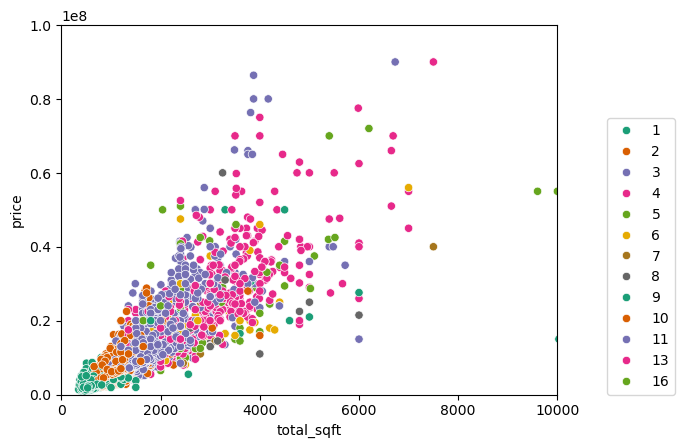

In [49]:
sns.scatterplot(data= cleaned_data, x='total_sqft',y='price', hue='size_bhk', palette='Dark2')
plt.legend(loc=(1.1, 0))
plt.xlim(0, 10000)
plt.ylim(0, 1e8)

In [50]:
cleaned_data.price = cleaned_data.price/ 100000

In [51]:
from sklearn.compose import make_column_transformer

In [52]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [53]:
cleaned_data.select_dtypes(include='object').columns

Index(['area_type', 'availability', 'location'], dtype='object')

In [54]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['area_type', 'availability', 'location']), remainder='passthrough')

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [56]:
lr = LinearRegression()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x = cleaned_data.drop(['price', 'price_per_sqft'], axis=1)

In [59]:
y = cleaned_data['price']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.pipeline import make_pipeline

In [62]:
scaler = StandardScaler()

In [63]:
pipe = make_pipeline(column_trans, scaler, lr)

In [64]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [65]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [66]:
r2_ls = r2_score(y_test, pipe.predict(x_test))

In [67]:
r2_ls

0.838589631116199

In [68]:
rm = Ridge()

In [69]:
pipe = make_pipeline(column_trans, scaler, rm)

In [70]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [71]:
r2_ls = r2_score(y_test, pipe.predict(x_test))

In [72]:
r2_ls #0.8385998567200623

0.8386348292570078

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rfr = RandomForestRegressor()

In [75]:
pipe = make_pipeline(column_trans, scaler, rm)

In [76]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['area_type', 'availability',
                                                   'location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [77]:
r2_rfr = r2_score(y_test, pipe.predict(x_test))
r2_rfr

0.8386348292570078

In [78]:
import pickle

In [79]:
pickle.dump(pipe, open('model.pkl', 'wb'))

In [80]:
cleaned_data = cleaned_data.drop('price_per_sqft', axis =1)
cleaned_data

,area_type,availability,location,size_bhk,total_sqft,bath,price
0,Super built-up Area,At available date,1st Block Jayanagar,4,2850.0,4.0,428.0
1,Super built-up Area,At available date,1st Block Jayanagar,3,1630.0,3.0,194.0
2,Super built-up Area,Ready To Move,1st Block Jayanagar,3,1875.0,2.0,235.0
3,Built-up Area,At available date,1st Block Jayanagar,3,1200.0,2.0,130.0
4,Super built-up Area,At available date,1st Block Jayanagar,2,1235.0,2.0,148.0
...,...,...,...,...,...,...,...
9988,Carpet Area,At available date,other,2,1200.0,2.0,70.0
9989,Super built-up Area,Ready To Move,other,1,1800.0,1.0,200.0
9992,Super built-up Area,Ready To Move,other,2,1353.0,2.0,110.0
9993,Plot Area,At available date,other,1,812.0,1.0,26.0


In [81]:
cleaned_data.to_csv('cleaned_data.csv', index=True)

In [82]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 9996
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7207 non-null   object 
 1   availability  7207 non-null   object 
 2   location      7207 non-null   object 
 3   size_bhk      7207 non-null   int32  
 4   total_sqft    7207 non-null   float64
 5   bath          7207 non-null   float64
 6   price         7207 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 422.3+ KB


In [83]:
x.columns

Index(['area_type', 'availability', 'location', 'size_bhk', 'total_sqft',
       'bath'],
      dtype='object')

In [168]:
cleaned_data.describe()

,size_bhk,total_sqft,bath,price
count,7207.000000,7207.000000,7207.000000,7207.000000
mean,2.490773,1501.802027,2.444290,99.277751
std,0.908768,927.175775,1.006459,97.711507
min,1.000000,350.000000,1.000000,10.000000
25%,2.000000,1100.000000,2.000000,50.000000
50%,2.000000,1263.000000,2.000000,73.000000
75%,3.000000,1680.000000,3.000000,110.000000
max,16.000000,30400.000000,16.000000,2200.000000
